Size of train y 404
iteration  0
total loss 0.9999999999999994
iteration  1
total loss 0.8581625060651962
iteration  2
total loss 0.7496026946886195
iteration  3
total loss 0.6659245943430188
iteration  4
total loss 0.6010056928108231
iteration  5
total loss 0.5503432124954261
iteration  6
total loss 0.510597094548849
iteration  7
total loss 0.4792686164874475
iteration  8
total loss 0.4544729197924314
iteration  9
total loss 0.43477686641932617
iteration  10
total loss 0.4190825838050589
iteration  11
total loss 0.40654315243778294
iteration  12
total loss 0.39650105420629156
iteration  13
total loss 0.3884428528124259
iteration  14
total loss 0.3819655385644641
iteration  15
total loss 0.37675132275222345
iteration  16
total loss 0.37254860408479773
iteration  17
total loss 0.36915748214410454
iteration  18
total loss 0.36641864947282377
iteration  19
total loss 0.36420481546046213
iteration  20
total loss 0.36241404309588765
iteration  21
total loss 0.360964542350212
iteration  22
t

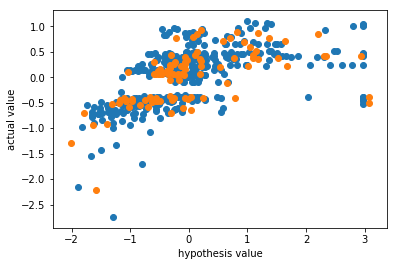

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

#importing and splitting training test sets
data = load_boston()
Y=data.target
#X=data.data
X=np.array(data.data)
X=X[:,:3]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
mean = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
X_train = (X_train - mean) / sigma
N=len(X_train)
weights=np.zeros((3,1))
b=1

mean_y = y_train.mean(axis=0)
sigma_y = y_train.std(axis=0)
y_train = (y_train - mean_y) / sigma_y

value_X=np.transpose(X_train)
value_Y=y_train
print("Size of train y",value_Y.size)
value_weights=np.transpose(weights)

test_X=X_test
mean1=test_X.mean(axis=0)
sigma1=test_X.std(axis=0)
final_test_X=(np.transpose((test_X - mean1) / sigma1))
test_Y=y_test
mean1_y=test_Y.mean(axis=0)
sigma1_y=test_Y.std(axis=0)
test_Y=(np.transpose((test_Y - mean1_y) / sigma1_y))

learning_rate = 0.1
epochs = 100
lmda= 0.3
    

#print(len(X.T))
def error(X,Y,W,b):
    set_plot=np.matmul(W,X)
    
    #print("SIZE :",plot_value_h.size)
    error_matrix=(((np.matmul(W,X)+b)-Y))
    #print(np.shape(error_matrix))
    new_value=np.square(error_matrix)
    total_loss=(1/2) * np.sum(new_value)
    final_total_loss=total_loss/len(Y)
    print("total loss",final_total_loss)
    
    
    return error_matrix,set_plot
#     print(error_matrix.shape)
    #left to find total cost(ie total error)
    
    
def gradient_step(X,Y,W,b,learning_rate):
    X_transpose=np.transpose(X)
    cost,plot=error(X,Y,W,b)
    gradient_weights=(1/ len(Y)) * ((np.matmul(cost,X_transpose)))
    gradient_bias=(1/len(Y)) * np.sum(cost)
    new_w = W - learning_rate*gradient_weights
    new_b = b - learning_rate*gradient_bias
    return [new_w,new_b],plot
       
       
def gradient_descent_runner(X,Y,W,b,learning_rate,epochs):
    final_w=W
    final_b=b
    
    for i in range(epochs):
        print("iteration ",i)
        [final_w,final_b],plot = gradient_step(X,Y,final_w,final_b,learning_rate)
    print("optimal values of weight is",final_w)
    print("optimal values of bias is",final_b)
    
    plt.scatter(Y,plot)
    plt.xlabel("hypothesis value")
    plt.ylabel("actual value")
    
    return final_w,final_b

def test_error(X,Y,W,b):
        plot=(np.matmul(W,X))
        error_matrix=((((np.matmul(W,X))+b)-Y))
        new_value=np.square(error_matrix)
        total_loss=(1/2)* np.sum(new_value)
        final_total_loss=total_loss/len(Y)
        
        plt.scatter(Y,plot)
        plt.xlabel("hypothesis value")
        plt.ylabel("actual value")
        print(" total avg test loss",final_total_loss)
        
        

    
# for training data    
optimal_w,optimal_b=gradient_descent_runner(value_X,value_Y,value_weights,b,learning_rate,epochs)
#for test case
test_error(final_test_X,test_Y,optimal_w,optimal_b)


#grid search
#possible hyperparameters
LR_values=np.array([0.001,0.01,0.03,0.1,0.3,1])
ep_value=np.array([10,100,200,500,1000,2000])

#accuracy
best_score=0
param_grid={'LR':None,'ep':None}

lireg=GridSearchCV()







